<a href="https://colab.research.google.com/github/DANCAR1969/programacion/blob/master/Vision_por_computadora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Vision por Computadora**

Modelo de visión por computadora para clasificación de imágenes usando CNN (Red Neuronal Convolucional) con el dataset Fashion MNIST y que incluye 6 visualizaciones explicativas

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


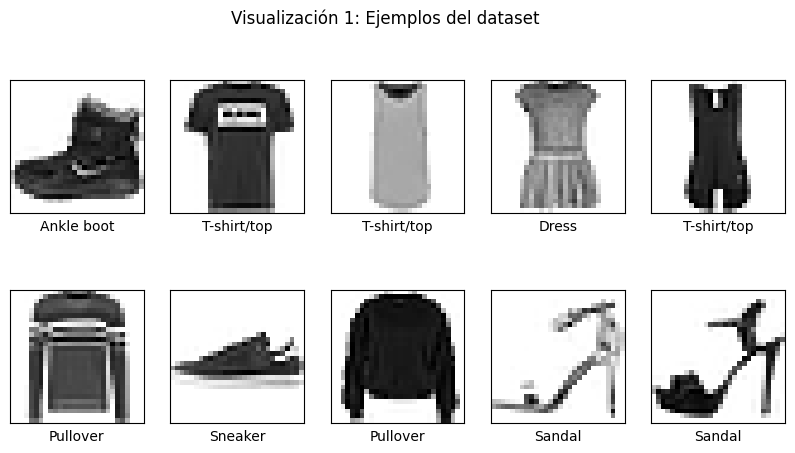

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - accuracy: 0.7666 - loss: 0.6407 - val_accuracy: 0.8758 - val_loss: 0.3388
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 32ms/step - accuracy: 0.8828 - loss: 0.3287 - val_accuracy: 0.8833 - val_loss: 0.3125
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9014 - loss: 0.2728 - val_accuracy: 0.9033 - val_loss: 0.2594
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9131 - loss: 0.2346 - val_accuracy: 0.9097 - val_loss: 0.2479
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9228 - loss: 0.2090 - val_accuracy: 0.9008 - val_loss: 0.2741


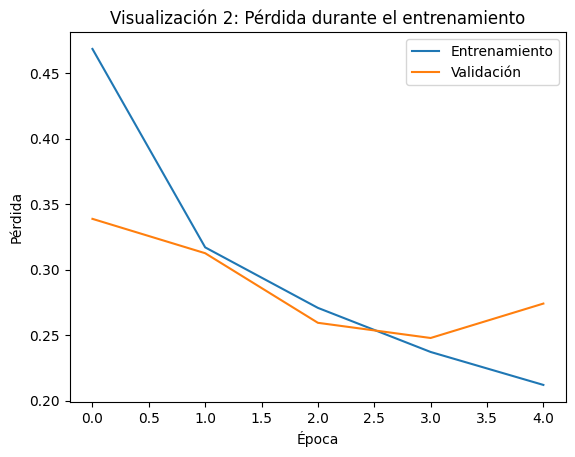

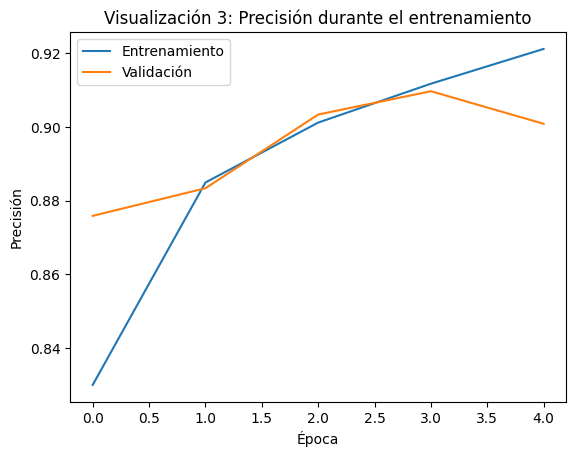

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8958 - loss: 0.2937
Precisión en test: 0.8951
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


<Figure size 1000x800 with 0 Axes>

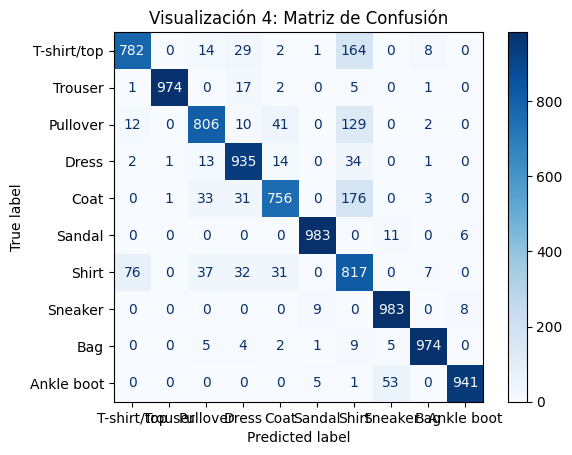

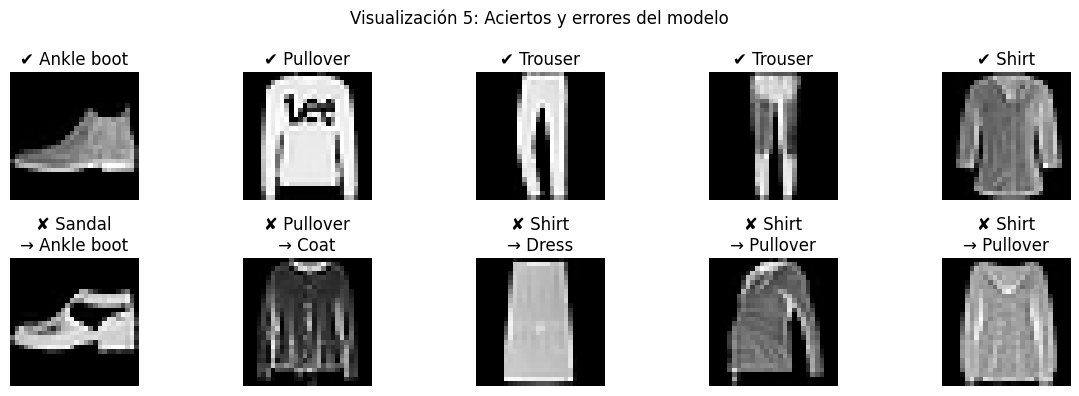

AttributeError: The layer sequential has never been called and thus has no defined input.

In [ ]:
# Paso 1: Importar librerías necesarias
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Paso 2: Cargar el dataset Fashion MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Paso 3: Normalizar imágenes
x_train = x_train / 255.0
x_test = x_test / 255.0

# Redimensionar para CNN (agregar canal)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Etiquetas de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Paso 4: Visualización 1 - 10 imágenes de entrenamiento
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.imshow(x_train[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.suptitle("Visualización 1: Ejemplos del dataset")
plt.show()

# Paso 5: Crear modelo CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Paso 6: Compilar modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Paso 7: Entrenar modelo
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Paso 8: Visualización 2 - Gráfica de pérdida
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Época'); plt.ylabel('Pérdida')
plt.title("Visualización 2: Pérdida durante el entrenamiento")
plt.legend()
plt.show()

# Paso 9: Visualización 3 - Gráfica de precisión
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Época'); plt.ylabel('Precisión')
plt.title("Visualización 3: Precisión durante el entrenamiento")
plt.legend()
plt.show()

# Paso 10: Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Precisión en test: {test_acc:.4f}")

# Paso 11: Visualización 4 - Matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10,8))
disp.plot(cmap=plt.cm.Blues)
plt.title("Visualización 4: Matriz de Confusión")
plt.show()

# Paso 12: Visualización 5 - Predicciones correctas y fallidas
correctas = np.where(y_pred_classes == y_test)[0][:5]
erroneas = np.where(y_pred_classes != y_test)[0][:5]

plt.figure(figsize=(12,4))
for i, idx in enumerate(correctas):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"✔ {class_names[y_pred_classes[idx]]}")
    plt.axis('off')
for i, idx in enumerate(erroneas):
    plt.subplot(2,5,i+6)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"✘ {class_names[y_pred_classes[idx]]}\n→ {class_names[y_test[idx]]}")
    plt.axis('off')
plt.suptitle("Visualización 5: Aciertos y errores del modelo")
plt.tight_layout()
plt.show()

# Paso 13: Visualización 6 - Activaciones de capas (opcional avanzada)
from tensorflow.keras import Model
layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_test[:1])

layer_names = ['Conv2D-1', 'MaxPool-1', 'Conv2D-2', 'MaxPool-2']
for layer_name, activation in zip(layer_names, activations):
    num_filters = activation.shape[-1]
    plt.figure(figsize=(15, 4))
    for i in range(min(8, num_filters)):
        plt.subplot(1, 8, i+1)
        plt.imshow(activation[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.suptitle(f"Visualización 6: Activaciones de {layer_name}")
    plt.show()
